## Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Original Dataset
X = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [910, 1477, 1540, 2222, 2075, 2767, 3524, 3242, 3968, 4133, 5421, 5171]

# Creating a DataFrame
df = pd.DataFrame(zip(X,y), columns=['X', 'y'])
df

In [ ]:
# Plot Dataset
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Linear Regression')
plt.scatter(X,y);

In [ ]:
# Original Dataset
X = np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape((-1,1))
y = np.array([910, 1477, 1540, 2222, 2075, 2767, 3524, 3242, 3968, 4133, 5421, 5171])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression().fit(X, y)

In [ ]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

In [ ]:
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

In [ ]:
y_pred = model.intercept_ + model.coef_ * X
print('predicted response:', y_pred, sep='\n')

In [ ]:
# Plot outputs
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Linear Regression')
plt.scatter(X, y,  color='blue')
plt.plot(X, y_pred, color='red', linewidth=3)
plt.show()

In [ ]:
# Linear Regression model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Original Dataset
X = np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape((-1,1))
y = np.array([910, 1477, 1540, 2222, 2075, 2767, 3524, 3242, 3968, 4133, 5421, 5171])

# fit Linear Regression model to the data
model = LinearRegression().fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot outputs
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Linear Regression')
plt.scatter(X, y,  color='blue', label='training data')
plt.plot(X, y_pred, color='red', label='linear regression', linewidth=2)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# predicting new variable 
a = np.array(7).reshape(-1,1)
y_pred2 = model.predict(a)
print('predicted response:', y_pred2, sep='\n')

In [ ]:
X.shape[0]

## Gradient Descent

In [ ]:
import numpy as np
import random
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Gradient Descent function
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])

    # total error, J(theta)
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
    
        # update theta
        t0 = temp0
        t1 = temp1

        # mean squared error
        e = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)]) 

        if abs(J-e) <= ep:
            print('Converged, iterations: ' + str(iter) + str('!!!'))
            converged = True
        
        J = e   # update error 
        iter += 1  # update iter
        
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True
    
    return t0,t1

# Create sample data
x, y = make_regression(n_samples=100, n_features=1, n_informative=1,
                       random_state=0, noise=20)
print('x.shape = %s y.shape = %s' %(x.shape, y.shape))

alpha = 0.01 # learning rate

# call gredient decent, and get intercept(=theta0) and slope(=theta1)
theta0, theta1 = gradient_descent(alpha, x, y, ep=0.001, max_iter=1000)
print('theta0 = %s theta1 = %s' %(theta0, theta1))

# check with scipy linear regression 
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
print('intercept = %s slope = %s' %(intercept, slope))

# Hypothesis
y_predict = theta0 + theta1*x

# Plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Linear Regression')
plt.scatter(x, y, color='blue', label='training data')
plt.plot(x, y_predict, color='red', label='linear regression', linewidth=2)
plt.legend(loc='upper left')
plt.show()
print("Done!")

In [ ]:
len(y_predict)

In [ ]:
plt.scatter(x,y)
plt.scatter(x,y_pred)

In [45]:
'''
Gradient Descent Algorithm
# MSE function is being used as the Cost Function
# Goal is to minimize this error value to obtain most accurate values for m and b
'''

import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([1,2,3])
y = np.array([2,3,6])

# Building the Gradient Descent function
def gradient_descent(x, y):
    m = 0 # Slope
    b = 0 # y-intercept
    
    n = float(len(x)) # Sample size of training set
    
    alpha = 0.1 # Learning rate
    epochs = 1000 # Number of iterations to perform Gradient Descent
    
    # Performing Gradient Descent
    for i in range(epochs):
        y_pred = m*x + b # Current predicted value of y
        cost = (1/n) * sum([val**2 for val in (y - y_pred)]) # MSE function is being used as the Cost Function
        Dm = (-2/n) * sum(x*(y - y_pred)) # Partial Derivative with respect of m
        Db = (-2/n) * sum(y - y_pred) # Partial Derivative with respect of b
        m = m - alpha*Dm # Updating current value of m
        b = b - alpha*Db # Updating current value of b
        
        # Print results
        # print("Iteration: {} m = {}, b = {}, error = {}".format(i, m, b, cost))
        
    return m, b

m, b = gradient_descent(x=x, y=y)
print(m, b)

1.9999999999879006 -0.3333333333058288


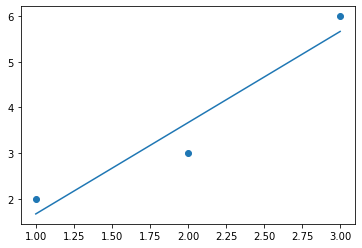

In [48]:
y_pred = m*x + b

plt.scatter(x,y)
plt.plot(x,y_pred)

In [34]:
m = 1.5 # Slope
b = 0 # y-intercept
n = float(len(x))

y_pred = m*x + b # Current predicted value of y

sq = []
for val in (y - y_pred):
    sq.append(val**2)
    J = (1/n) * sum(sq)
    print(y, y_pred, val, sq, J)
    


[2 3 6] [1.5 3.  4.5] 0.5 [0.25] 0.08333333333333333
[2 3 6] [1.5 3.  4.5] 0.0 [0.25, 0.0] 0.08333333333333333
[2 3 6] [1.5 3.  4.5] 1.5 [0.25, 0.0, 2.25] 0.8333333333333333


In [ ]:
def init(n):
    return {"w": np.zeros(n), "b": 0.0}


def predict(x, parameters):
    # Prediction initial value
    prediction = 0
    
    # Adding multiplication of each feature with it's weight
    for weight, feature in zip(parameters["w"], x):
        prediction += weight * feature
        
    # Adding bias
    prediction += parameters["b"]
        
    return prediction

# Used features and target value
features = ["size"]
target = ["price"]

# Slice Dataframe to separate feature vectors and target value
X, y = df_data[features].as_matrix(), df_data[target].as_matrix()

# Initialize model parameters
n = len(features)
model_parameters = init(n)

# Make prediction for every data sample
predictions = [predict(x, model_parameters) for x in X]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Original Dataset
# x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
# y = np.array([2,5,4,7,6,9,11,12,15,13,16,18])

x = np.array([1,2,3,4,5])
y = np.array([2,5,4,7,6])

# Theta values
t0 = 0 # Intercept
t1 = 0 # Slope

# Variables
max_iter = 5 # Number of iterations
m = len(y) # Sample size
alpha = 0.01 # Learning rate



# Loop through iterations
# for i in range(max_iter):
#     y_pred = t0 + t1*x
#     J = (1/2*m) * sum([val**2 for val in (y_pred-y)])
#     print(J)
#     J2 = sum([(y_pred - y)**2 for i in range(m)])
#     print(J2)
    
# Hypothesis
y_pred = t0 + t1*x
print('y_pred:', y_pred)
print('y_actual:', y)
print('derivative:', y_pred-y)

J = 0
for i,j in enumerate(y_pred-y):
    d = j**2
    print('d'+str([i])+':', d)
    J += d
    print('J'+str([i])+':', J,'\n')

print(J)

# J = (1/2*m) * sum([val**2 for val in (y_pred-y)])
# print(J)

# Plot
plt.scatter(x,y);
plt.plot(x,y_pred);
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x,y):
    t0, t1 = 0, 0 # initial theta
    max_iter = 10000 # number of iterations
    m = len(y) # sample size
    alpha = 0.01 # learning rate
    
    # loop through iterations
    for i in range(max_iter):
        y_pred = t0 + t1*x
        cost = (1/m) * sum([val**2 for val in (y_pred-y)])
        grad0 = -(2/m) * sum(y-y_pred)
        grad1 = -(2/m) * sum((y-y_pred)*x)
        
        t0 = t0 - alpha * grad0
        t1 = t1 - alpha * grad1
        print("t0 {}, t1 {}, cost {}, iteration {}".format(t0, t1, cost, i))
        
    return t0, t1

# Original Dataset
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
y = np.array([2,5,4,7,6,9,11,12,15,13,16,18])

gradient_descent(x,y)
# (0.7878787878787747, 1.3916083916083932)

In [ ]:
# Assigning values to theta0, theta1
theta0, theta1 = gradient_descent(x,y)

# Hypothesis Function
y_predict = theta0 + theta1*x

# Plot
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Linear Regression')
plt.scatter(x, y,  color='blue', label='training data')
plt.plot(x, y_predict, color='red', label='linear regression', linewidth=2)
plt.legend(loc='upper left')
plt.show()
print("Done!")